<a href="https://colab.research.google.com/github/rjkevin/TextBlob-Sentiment-Analysis/blob/main/Sentiment_Analysis_using_TextBlob_Amazon_Alexa_Customer_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TextBlob


* Beginner friendly Natural Language Processing (NLP) library that is used to process unstructured textual data
* Lexicon-based approached. [TextBlob Lexicon]( https://github.com/sloria/TextBlob/blob/eb08c120d364e908646731d60b4e4c6c1712ff63/textblob/en/en-sentiment.xml) 
* Built on the shoulders of Natural Language Tool Kit (NLTK) and Pattern
* Other notable NLP libraries e.g NLTK and Spacy 

Applications:
* Sentiment Analysis
* Noun Phrase Extractions
* Part of Speech ( POS) Tagging
* Tokenization
* Lemmatization
* N-grams 
* Spelling Check
* Summarizing Texts
* Translation and Language Detection


# Understanding Sentiment Analysis using TextBlob

Sentiment analysis identifies the emotions behind a text. TextBlob is able to identify positive/ negative sentiments and its degree of subjectivity 

> Polarity : -1 to +1 (Measures how negative or positive a statement is)  <br>
 Subjectivity : 0 to 1 (Indicates how objective or subjective a statement is)

Read [here](https://planspace.org/20150607-textblob_sentiment/) on how polarity and subjectivity are calculated using TextBlob



**Import textblob library**

In [6]:
from textblob import TextBlob

**Understanding Polarity Scores** <br>
Polarity ranges from -1 ( negative emotions) to 1 ( positive emotions)

In [7]:
google_review1 ='''first trial and good experience
staff really know how to treat customers the place is clean
the food is good and suits the price
Operation hrs from 7am- 1030pm'''

google_review2 = '''Have to order by phone, but slow service. Got some kind 
of smell and flies flying around. Not a good experience, 
food is just average to be honest.'''

blob1 = TextBlob(google_review1)
blob2 = TextBlob(google_review2)

result_1= round(blob1.sentiment.polarity,2)
result_2= round(blob2.sentiment.polarity,2)

print('Google Review 1:','\nPolarity score is {} \n'.format(result_1))
print('Google Review 2:','\nPolarity score is {}'.format(result_2))



Google Review 1: 
Polarity score is 0.44 

Google Review 2: 
Polarity score is 0.08


Based on the polarity score above,Google Review 1 scored higher as compared to  Google Review 2. 

 TextBlob is able to identify that Google review 1 has a more postive sentiment as compared to Google Review 2

**Understanding Subjectivity Scores** <br>
Subjectivity ranges from 0 ( objective statements) to 1 ( subjective statements)
- "Malaysia is a country" is an objective fact. <br> Subjectivity scores expected to lean towards 0 
- "Malaysia is very hot" is a subjective statement. <br> Some people might feel otherwise. <br> Hence, subjectivity score is expected to lean towards 1

In [8]:
review_1 = 'Malaysia is a country'
review_2 = ' Malaysia is very hot '

blob1 = TextBlob(review_1)
blob2 = TextBlob(review_2)

print(blob1.sentiment.subjectivity)
print(blob2.sentiment.subjectivity)

0.0
1.0


# Case Study - Analyze customer reviews for Amazon Alexa

**Objectives:**
1. Explore dataset
2. Determine bestsellers, overall feedbacks, ratings of different variations
2. Determine overall customer sentiment towards Amazon Alexa using TextBlob sentiment analysis
4. Extract reviews with certain keywords
5. Extract negative feedbacks to understand better customers concerns
6. Explore outliers and understand the discrepencies 

### **Step 1**: Load dataset into a dataframe 

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/amazon_alexa 2.csv')
df.sample(5)

,rating,date,variation,verified_reviews,feedback
2760,5,30-Jul-18,Black Dot,Love it. It works great. Alexa still has som...,1
523,5,21-Jun-18,White,"Great price, works perfectly. Saved the money ...",1
3096,1,30-Jul-18,White Dot,The product sounded the same as the emoji spea...,0
2036,4,16-Jul-18,Black Plus,It get on sale after 2 days so ... CHECK EVENT...,1
805,4,30-Jul-18,Charcoal Fabric,"Great device, responsive and helpful",1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


### **Step 2**: Identifying missing data

In [10]:
df.isnull().any()

rating              False
date                False
variation           False
verified_reviews    False
feedback            False
dtype: bool

### **Step 3**: Identifying Polarity and Subjectivity scores using TextBlob

In [11]:
from textblob import TextBlob

In [12]:
score = [TextBlob(x).sentiment for x in df['verified_reviews']]

In [14]:
df_polarity = pd.DataFrame(score,columns=['polarity','subjectivity'])

df_results = df.join(df_polarity)
df_results.sample(5)

,rating,date,variation,verified_reviews,feedback,polarity,subjectivity
739,5,30-Jul-18,Sandstone Fabric,Great,1,0.800000,0.7500
2560,5,30-Jul-18,White Dot,Love the echo dot it’s amaxing!!!,1,0.976562,0.6000
2644,4,30-Jul-18,Black Dot,Small speaker tin sound. Great with good Bluet...,1,0.412500,0.5375
260,5,29-Jul-18,Heather Gray Fabric,Have Alexa throughout the house----the future ...,1,0.000000,0.1250
1302,5,22-Jul-18,Black Spot,I love love love it.,1,0.500000,0.6000


### **Step 4**: Data Visualisation





In [143]:

%config InlineBackend.figure_format='retina'
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


**Distribution of variations in Alexa**

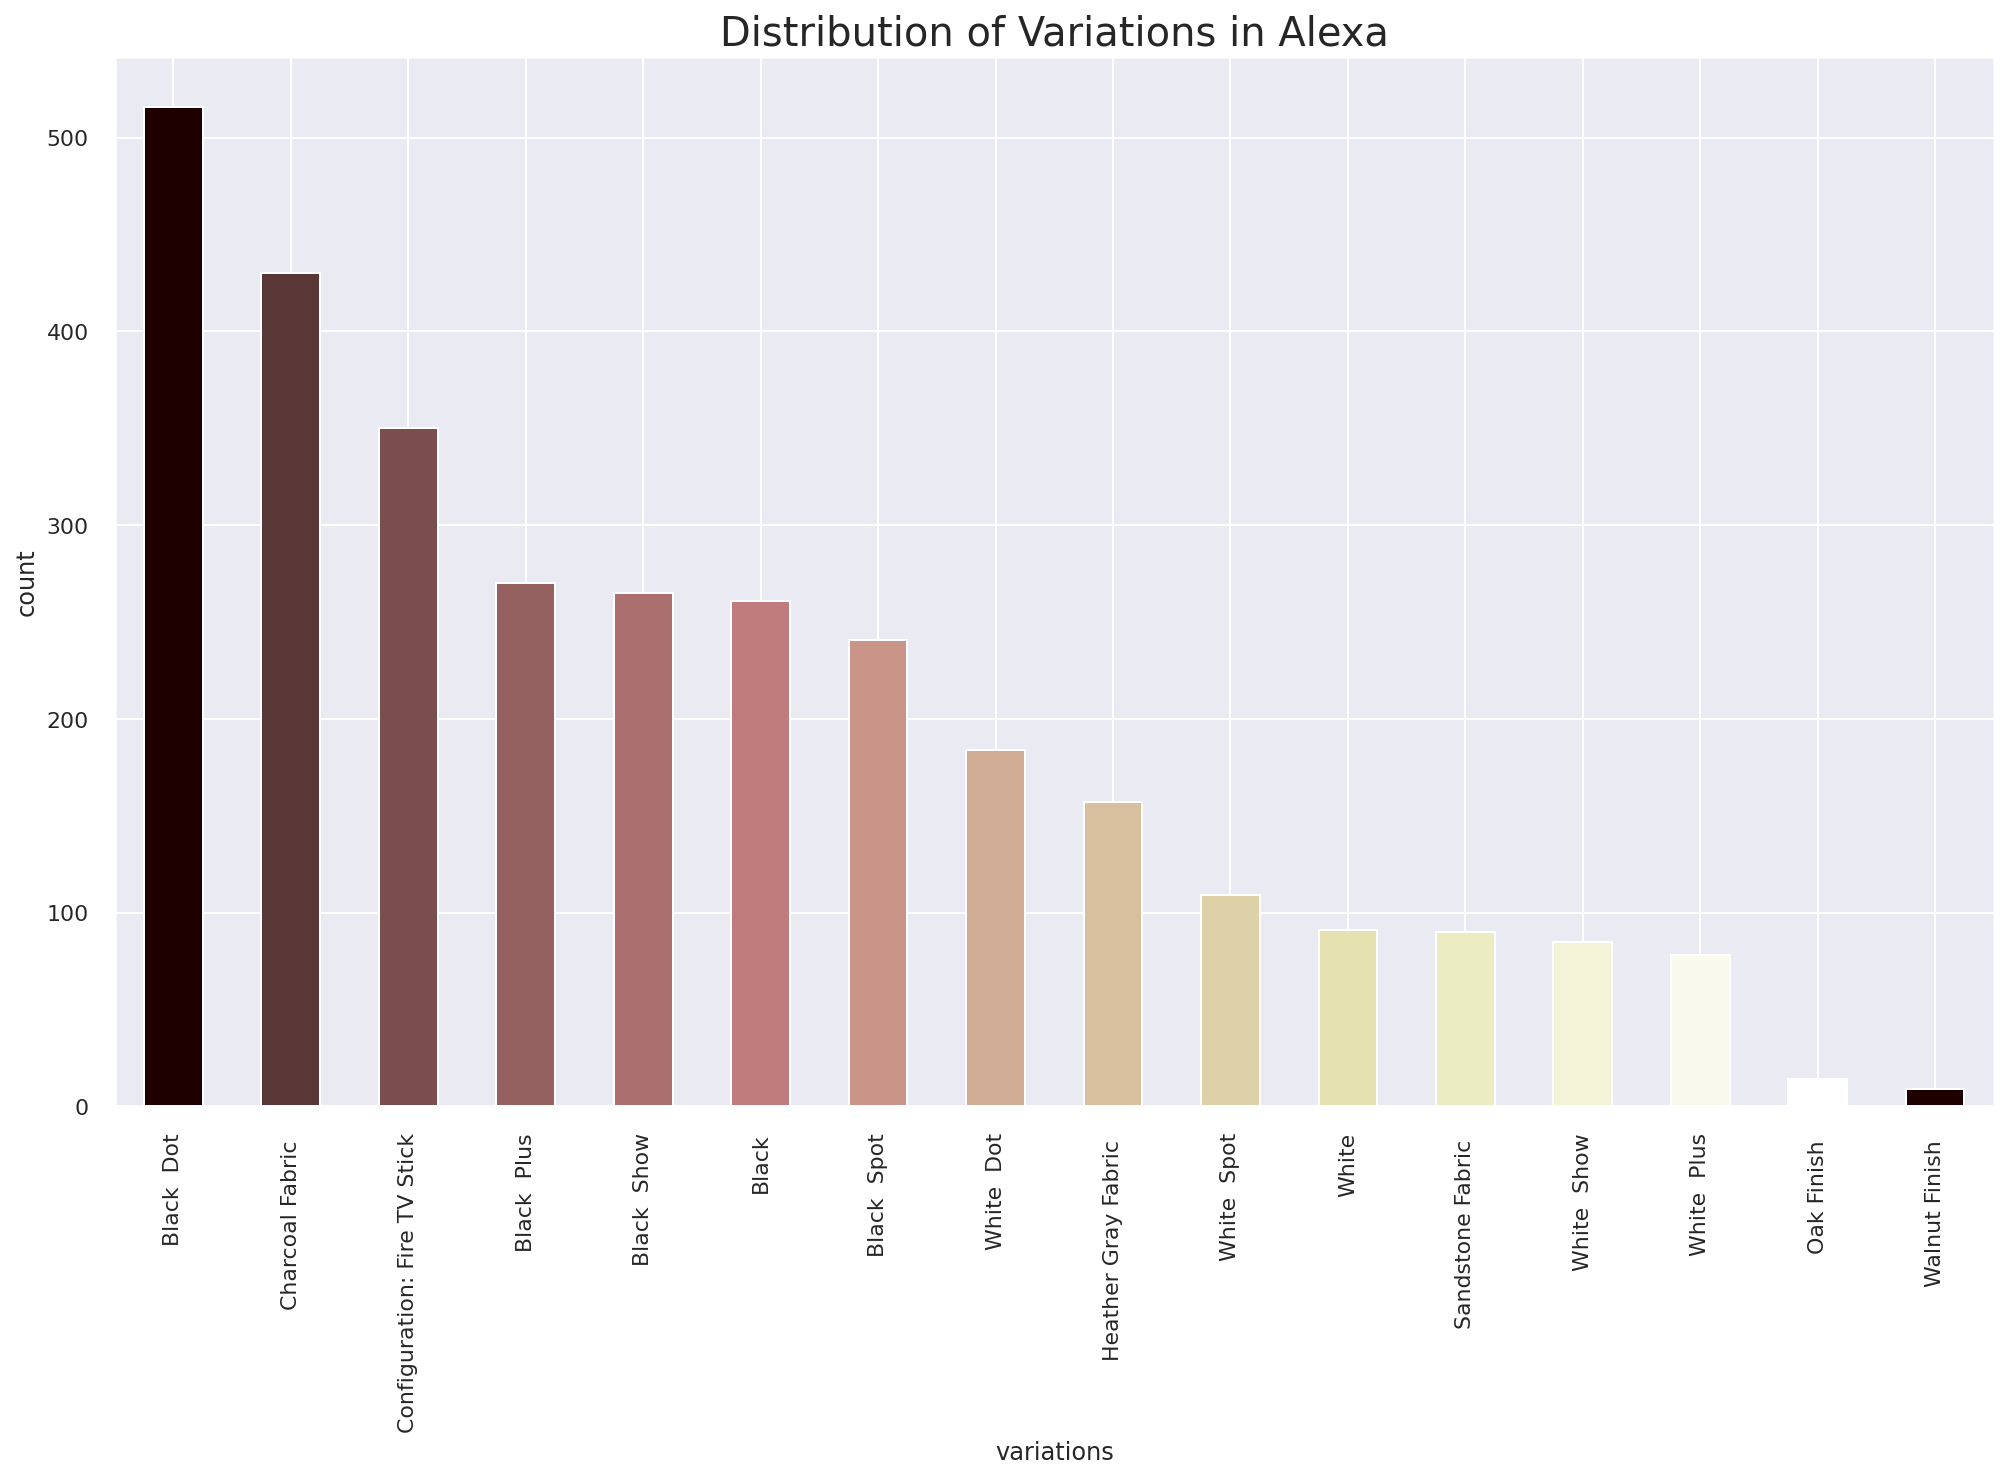

In [144]:
color = plt.cm.pink(np.linspace(0, 1, 15))
df_results['variation'].value_counts().plot.bar(color = color, figsize = (15, 9))
plt.title('Distribution of Variations in Alexa', fontsize = 20)
plt.xlabel('variations')
plt.ylabel('count')
plt.show()

The bar plot above illustrates the popularity of different variations of Amazon Alexa.

> Black Dot is the bestseller followed by Charcoal Fabric and Fire TV Stick. <br> Least popular variations includes Oak and Walnut Finish

---







**Distribution of Ratings**

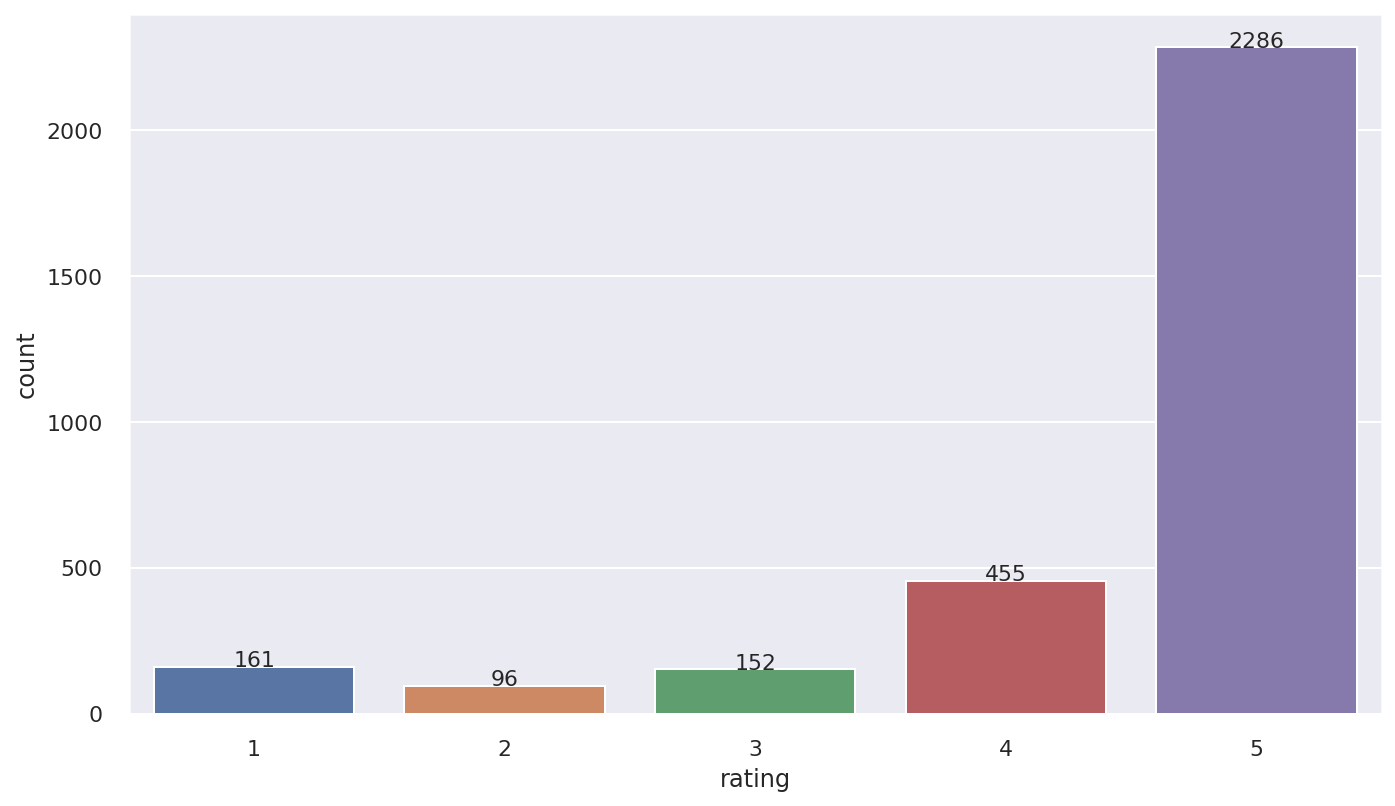

In [145]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='rating', data= df_results)

for rect in ax.patches:
  ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)




> The bar chart shows, about 92% of customers gave Amazon alexa rating between 3 - 5 while about 8% percent gave a rating between 1 - 2.



**Variations and Ratings**

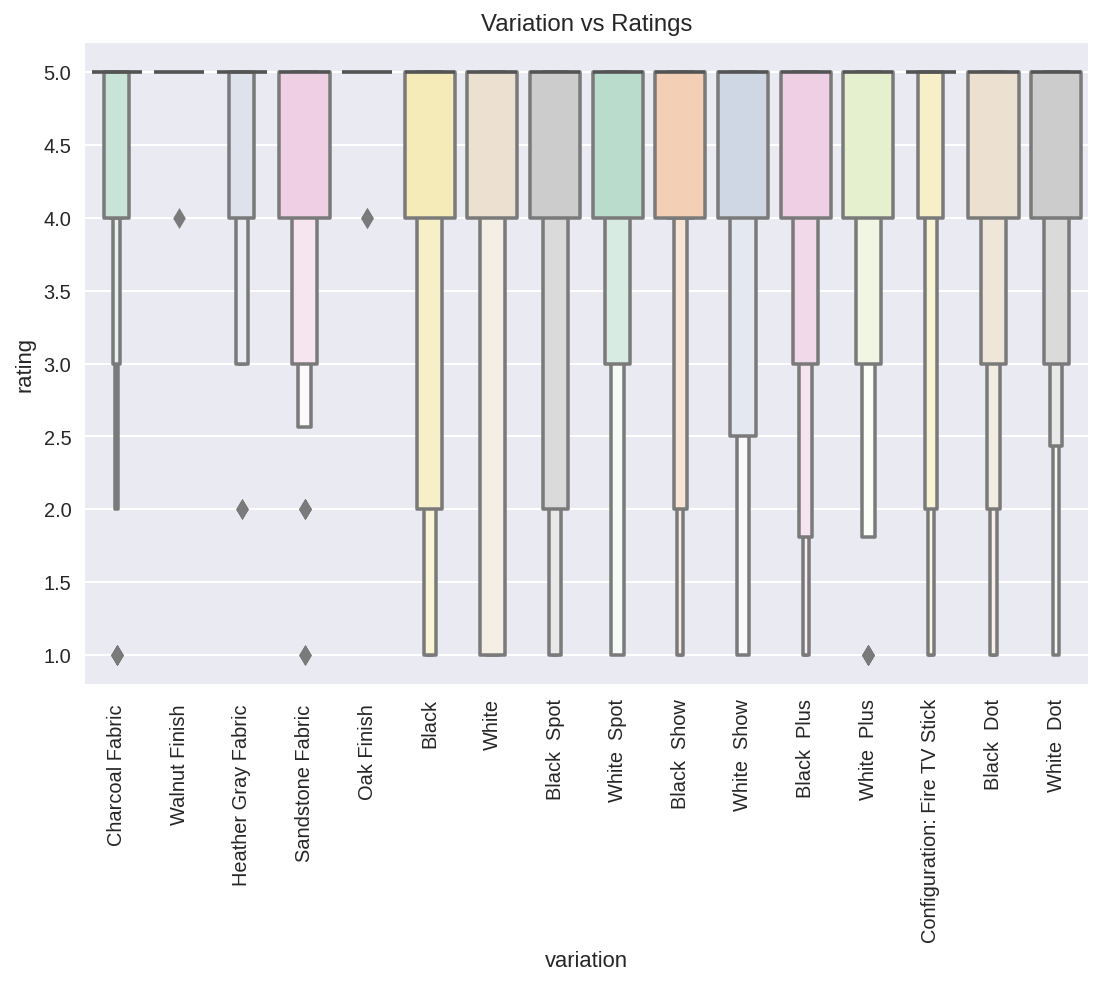

In [170]:

plt.style.use('seaborn')
sns.boxenplot(df_results['variation'], df_results['rating'],data=df_results, palette = 'Pastel2')
plt.title("Variation vs Ratings")
plt.xticks(rotation = 90)
plt.show()



> Based on the boxenplot shown above, Walnut Finish and Oak Finish seems to garner mostly higher ratings whereas White and Black variation of Amazon Alexa appears to have a greater degree of mixed feelings among the users. 

>Despite, Walnut and Oak Finish being the least units sold, customers seems to be most satisfied with it. 



**Distribution of Feedbacks**

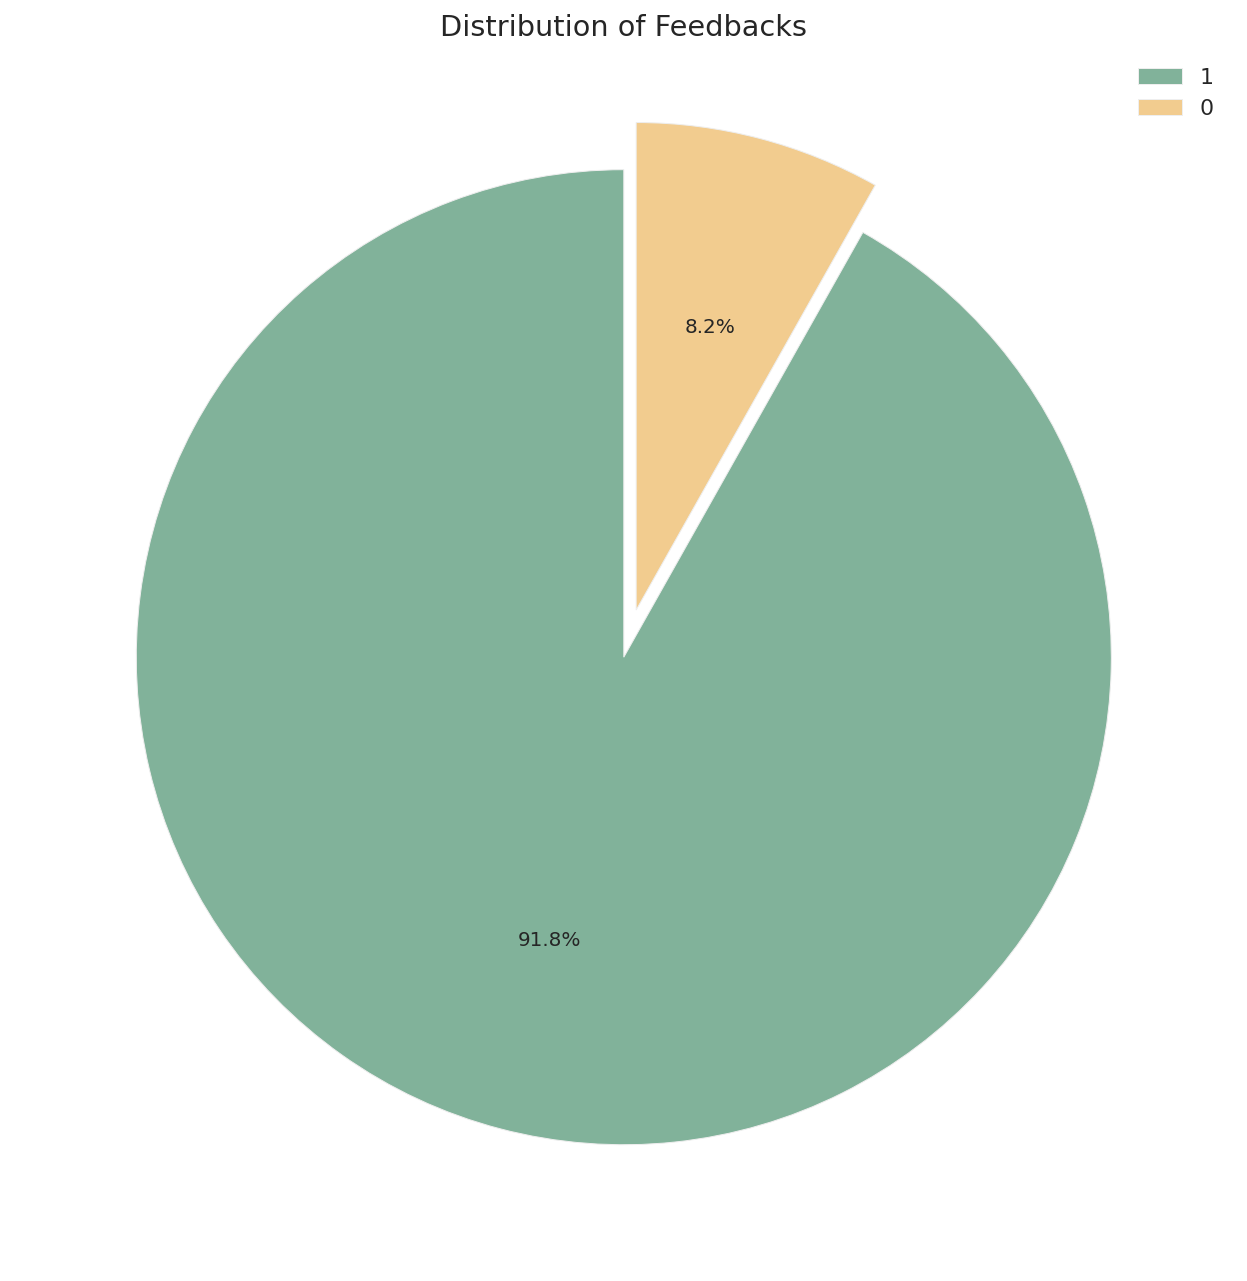

In [147]:
plt.style.use('ggplot')
slices = df_results['feedback'].value_counts()
labels = ['1','0']
explode = [0,0.1]

colors =['#81B29A','#F2CC8F']

plt.pie(slices,explode=explode,startangle=90, autopct='%1.1f%%',colors=colors )

plt.title('Distribution of Feedbacks')
plt.tight_layout()
plt.legend(labels)
plt.show()

> Based on the feedbacks recieved from customers, about 92% of customers are pleased with Amazon Alexa while the other 8% feels the product is unsatisfactory. Generally, we can conclude that Amazon Alexa is widely accepted by the consumer market.





**Relationship of Ratings and Feedbacks**

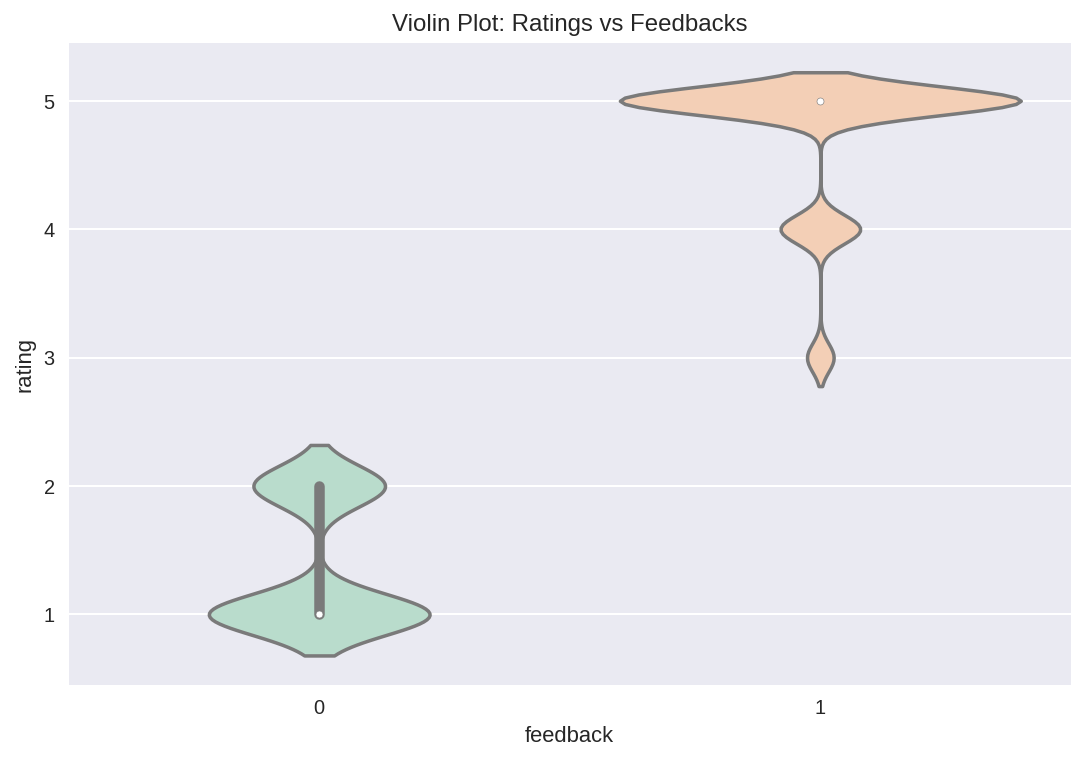

In [148]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12, 7)
plt.style.use('seaborn')

sns.violinplot(df_results['feedback'], df_results['rating'], palette = 'Pastel2')
plt.title("Violin Plot: Ratings vs Feedbacks")
plt.show()

> The violin plot above, shows the relationship between Ratings and Feedbacks. We can conclude that customers who are satisfied ( 1 )  with Amazon Alexa gave between 3 - 5 star rating whereas customers who are unsatisfied ( 0 ) gave a rating between 1 - 2 

**Distribution of Polarity Scores**

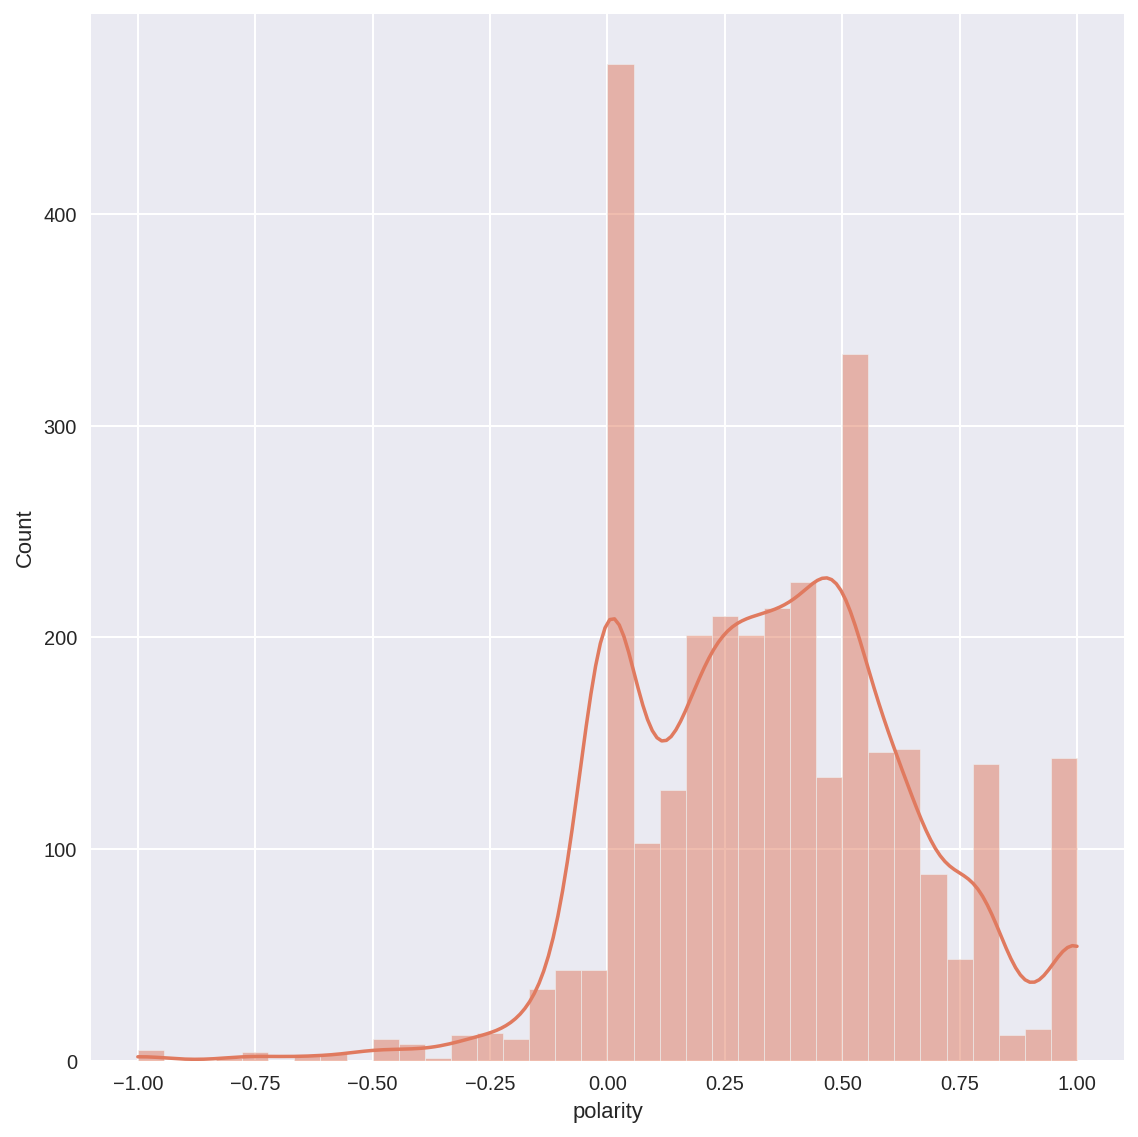

In [149]:
sns.displot( x='polarity',data=df_results,kde=True,height=8,aspect=1, color='#E07A5F');


>Based on the histogram above, graph is skewed to the right. Overall customer sentiment towards alexa is leaning towards positive






**Polarity Grouped By Ratings**

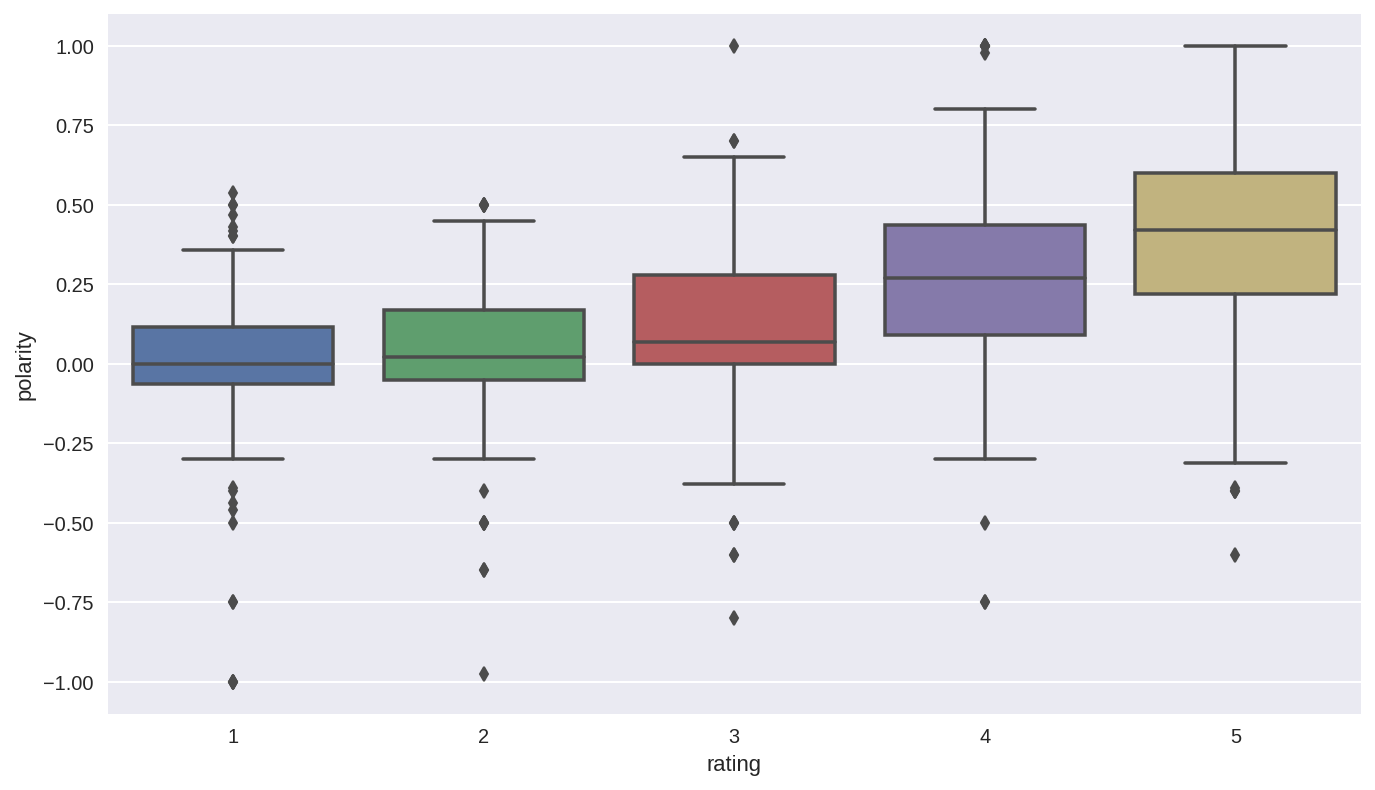

In [150]:
plt.figure(figsize=(10,6))
sns.boxplot(x='rating', y='polarity', data=df_results)
plt.show();

**Word Cloud**

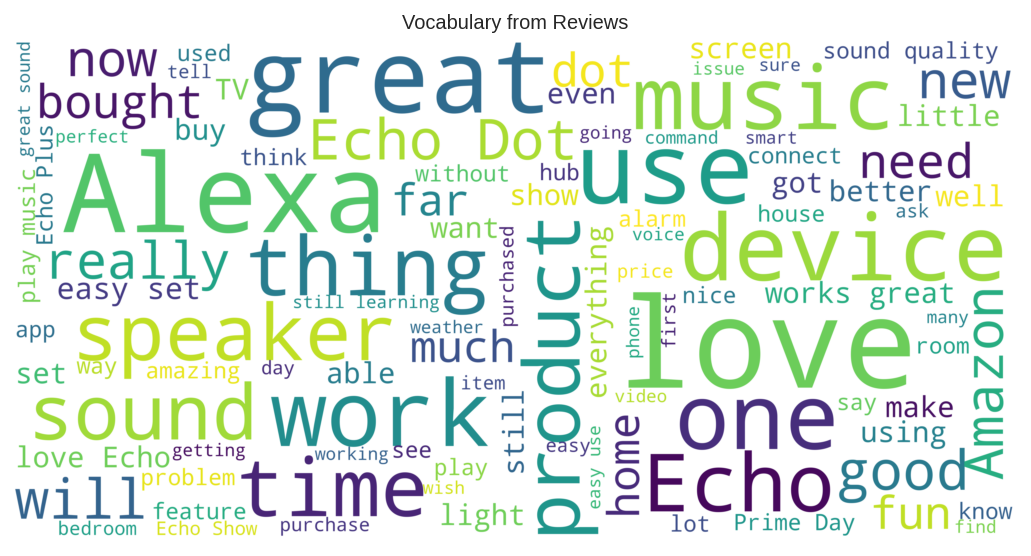

In [151]:
from wordcloud import WordCloud

word_cloud_text = ''.join(df_results['verified_reviews'])

wordcloud = WordCloud(max_font_size=100, # Maximum font size for the largest word
                      max_words=100, # The maximum number of words
                      background_color="white", # Background color for the word cloud image
                      scale = 10, # Scaling between computation and drawing
                      width=800, # Width of the canvas
                      height=400 # Height of the canvas
                     ).generate(word_cloud_text)

plt.figure()
plt.imshow(wordcloud, 
           interpolation="bilinear") # to make the displayed image appear more smoothly
plt.axis("off")
plt.title("Vocabulary from Reviews", fontsize = 10)
plt.show()

>Word cloud depicts the most frequently occuring vocabulary in the reviews. The bigger the word, the more frequently it appears.

**Finding reviews based on vocabulary**

In [188]:
 

df_bad = df_results[df_results.rating ==1]
df_bad

speaker = []
 for x in df_bad['verified_reviews']:
   if "speaker" in x:
     speaker.append(x)

speaker


['I own 3 of these...  amazon is ignoring its customers and using these devices as a marketing tool.  You can customize the screen contents, but you cannot turn off there advertising, Things to Try...  People will suggest that you can, but you can only do so if you turn off all content changes which is not an acceptable option.Moreover, they should increase the size slightly, and improve the audio speaker.  That would give you a 5 star device.Right now i’m debating whether to return all 3 devices.  My wife says we should.',
 "Don't waste your money.  I own an echo gen 1, and echo gen 2 and a dot. They all do a far better job of voice recognition that the Echo Show.  In fact, it is so bad that it is virtually useless.  Also, the speaker is incredibly bass heavy....so much so that it is hard to understand voices.  I've worked to adjust the bass and punch the mids and treble, but it still sounds awful.  Finally, the screen just doesn't add much.  I can't see if from across the room, it ra



> It seems that a handful of customers who rated the product 1 star, are unsatisfied with Amazon Alexa's speakers: 
- The quality of the speakers relative to its pricing is absurd
- Prefers a slightly bigger speakers
- Speakers appears to be bass heavy and difficult to understand voices 
- Difficulty in pairing speaker via bluetooth which often leads to intereference



**Extracting & inspecting lowest polarity reviews** 

In [17]:
df_results[df_results.polarity == -1].verified_reviews.head()

661     This Echo Dot is horrible. The volume on my ph...
1340    Get rid of the &#34;Thongs To Try&#34; screen!...
1386    Invasive and scared the crap out of me for spe...
1903             Terrible. Stopped working after one day.
Name: verified_reviews, dtype: object

**Extracting & Inspecting lowest rating reviews**

In [37]:
df_bad = df_results[df_results.rating ==1]
df_bad

,rating,date,variation,verified_reviews,feedback,polarity
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,-0.100000
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,0.300000
341,1,28-Jul-18,Charcoal Fabric,Alexa hardly came on..,0,-0.291667
350,1,31-Jul-18,Black,Item no longer works after just 5 months of us...,0,0.000000
361,1,29-Jul-18,Black,This thing barely works. You have to select 3r...,0,-0.037500
...,...,...,...,...,...,...
3024,1,30-Jul-18,Black Dot,I was really happy with my original echo so i ...,0,0.116667
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0,0.000000
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0,-0.750000
3091,1,30-Jul-18,Black Dot,I didn’t order it,0,0.000000


# Investigating Outliers

**Extracting & Inspecting reviews with low polarity but with 5 star rating**

In [19]:
df_results[(df_results.rating ==5) & (df_results.polarity <-0.25)]

,rating,date,variation,verified_reviews,feedback,polarity
1175,5,28-Jul-18,Black Spot,still learning how to ise it but is DOES NOT d...,1,-0.390625
1751,5,31-Jul-18,Black Plus,Plug n Play set up is simple. Added battery ba...,1,-0.400000
2105,5,31-Jul-18,Configuration: Fire TV Stick,Cord cutting,1,-0.600000
2360,5,30-Jul-18,Configuration: Fire TV Stick,I bought this fire stick for another TV! No mo...,1,-0.312500
2702,5,30-Jul-18,Black Dot,I'm addicted to this thing.,1,-0.400000
3053,5,30-Jul-18,Black Dot,I'm addicted to this thing.,1,-0.400000


**Extracting and inspecting reviews with low ratings but high polarity**

In [22]:
df_results[(df_results.rating ==1)& (df_results.polarity > 0.25)]

,rating,date,variation,verified_reviews,feedback,polarity
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,0.300000
424,1,11-Jul-18,Black,Great product but returning for new Alexa Dot....,0,0.468182
613,1,3-Jun-18,Black,All the new Amazon products I have are great e...,0,0.259091
857,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,0.300000
1147,1,29-Jul-18,Black Spot,"When we first received this product, it was gr...",0,0.430000
1352,1,19-Jul-18,Black Spot,"The product is attractive and somewhat useful,...",0,0.537500
1540,1,30-Jul-18,Black Show,Fire HD does so much more. Over priced pair o...,0,0.500000
1602,1,29-Jul-18,Black Show,Returned from repair with No repair done. It h...,0,0.275000
1612,1,29-Jul-18,Black Show,"Great device, features are awesome, the intera...",0,0.266667
1689,1,28-Jul-18,White Show,"Works fine, I just realize I don’t need this b...",0,0.416667


>As mentioned, machines often times don't understand the context of words. Case in point, "I'm addicted to this thing.	" has a customer rating of 5 but a low polarity score of - 0.4. Technically, what the user is saying is that he/she loves and can't get enough of the product. However, TextBlob inteprets this as a negative sentiment because the word '*addicted*' has a negative connotation with a  polarity score of -0.4 in the TextBlob lexicon.